#### 4.1.1 지도 학습 
 
지도 학습은 대부분 분류와 회귀로 구성

- 시퀀스 생성: 사진이 주어지면 이를 설명하는 캡션을 생성 , 시퀀스 생성은 이따금(시퀀스에 있는 단어나 토큰을 반복적으로 예측하는 것처럼) 일련의 분류 문제로 재구성 가능
- 구문 트리 예측: 문장이 주어지면 분해된 구문트리를 예측 
- 물체 감지: 사진이 주어지면 사진 안의 특정 물체 중위에 경계 상자를 그림 
- 이미지 분할 : 사진이 주어졌을 때 픽셀 단위로 특정 물체에 마스킹을 함

#### 4.1.2 비지도 학습
데이터 분석에서 핵심

-차원 축소와 군집이 비지도 학습

#### 4.1.3 자기 지도 학습

지도학습이지만 학습과정에 사람이 개입하지 않는 지도 학습 

ex. 오토인코더

#### 4.1.4 강화학습 

강화학습에서 에이전트는 환경에 대한 정보를 받아 보상을 최대화 하는 것

#### 4.2.1 훈련, 검증, 테스트 세트

- 단순 홀드아웃 검증 

    데이터의 일정량을 테스트 세트로 떼어 놓음'
    단점: 데이터가 적을 때는 검증 세트와 테스트 세트의 샘플이 너무 적어 전체 데이터를 통계적으로 대표하지 못함  
    [예시 사진](https://t1.daumcdn.net/cfile/tistory/9955CF485E24EFD222)

``` python

num_validation_samples = 10000

np.random.shuffle(data) # 데이터를 섞는 것(셔플링)이 일반적으로 좋다

validation_data = data[:num_validation_samples] # 검증 세트를 만듬
data = data[num_validation_samples:]

training_data= data[:] # 훈련 세트를 만듬

# 훈련 세트에서 모델을 훈련하고 검증 세트로 평가
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# 하이퍼파라미터 튜닝이 끝나면 테스트 데이터를 제외한 모든 데이터를 사용하여 모델을 다시 훈련
model = get_model()
model.train(np.concatenate([training_data,
                            validation_data]))
test_score = model.evaluate(test_data)

```

- k-겹 교차 검증
K 겹 교차 검증(Cross validation)이란 통계학에서 모델을 "평가" 하는 한 가지 방법입니다. 
- 소위 held-out validation 이라 불리는 전체 데이터의 일부를 validation set 으로 사용해 모델 성능을 평가하는 것의 문제는 데이터셋의 크기가 작은 경우 테스트셋에 대한 성능 평가의 신뢰성이 떨어지게 된다는 것입니다.
- K-겹 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다

``` python
k= 4
num_validation_samples= len(data) //k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
    # 검증 데이터 부분을 선택 
    validation_data = data[num_validation_samples*fold:
                           num_validation_samples*(fold +1 )]
    # 남은 데이터를 훈련 데이터로 사용, 리스트에서 + 연산자는 두 리스트를 더하는 것이 아니고 연결
    trainig_data =data[:num_validation_samples*fold]+ data[num_validation_samples*(fold+1):]
    
    model = get_model() # 훈련되지 않은 새로운 모델을 만듬
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_scores) 
validation_score = np.average(validation_scores) # 검증 점수: K개 폴드의 검증 점수 평균

# 테스트 데이터를 제외한 전체 데이터로 최종 모델을 훈련 됩니다.
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

```
- 셔플링을 사용한 반복 k- 겹 교차 검증: 가용 데아터가 적고 가능한 정확한 모델을 만들때 
- 결국  PxK개(p는 반복 횟수)

### 4.3 데이터 전처리,특성 공학,특성 학습

#### 4.3.1 신경망을 위한 데이터 전처리 

- 벡터화,정규화,누락된 값 다루기,특성 추출
    
    신경망에서 모든 입력과 타깃은 부동 소수 데이터로 이루어진 텐서여야함

- 값 정규화
- 누락된 값 다루기 

    테스트 데이터에 누락된 값이 포함 될 가능성이 있다고 가정

#### 4.3.2 특성 공학 
- 최근 딥러닝에선 불필요 
- 좋은 특성은 적은 자원을 사용하여 문제를 더 멋지게 풀어낼 수 있음 
- 좋은 특성은 더 적은 데이터로 문제를 풀 수 있음

#### 4.4 과대적합과 과소적합

- 과대 적합 : 모델이 훈련 데이터에 너무 잘 맞지만 일반성이 떨어진다는 의미
   
    해결 방법
    1. 훈련 데이터를 더 많이 모음
    2. 정규화(Regularization) - 규제(제약 조건), 드롭-아웃 등 다양한 방법을 이용해서 적당한 복잡도를 가지는 모델을 자동적으로 찾아주는 기법
    3. 훈련 데이터 잡음을 줄임(오류 수정과 이상치 제거)
- 과소 적합 :  모델이 너무 단순해서 데이터의 내재된 구조를 학습하지 못할 때 발생
    
    해결방법
    1. 파라미터가 더 많은 복잡한 모델을 선택
    2. 모델의 제약을 줄이기(규제 하이퍼파라미터 값 줄이기)
    3. 조기종료 시점(overfitting이 되기 전의 시점)까지 충분히 학습

##### 4.4.1 네트워크 크기 축소

- 과대 적합을 막는 방법: 모델의 크기,즉 모델에 있는 학습 파라미터의 수를 줄이는 것 


In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:

original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))


Epoch 1/20
49/49 [==============================] - 1s 30ms/step - loss: 0.4473 - acc: 0.8254 - val_loss: 0.3359 - val_acc: 0.8773
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2555 - acc: 0.9120 - val_loss: 0.2906 - val_acc: 0.8852
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1975 - acc: 0.9307 - val_loss: 0.3061 - val_acc: 0.8762
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1670 - acc: 0.9408 - val_loss: 0.2936 - val_acc: 0.8830
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1439 - acc: 0.9496 - val_loss: 0.3391 - val_acc: 0.8722
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1292 - acc: 0.9554 - val_loss: 0.3587 - val_acc: 0.8674
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1131 - acc: 0.9610 - val_loss: 0.3574 - val_acc: 0.8726
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1015 - a

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 27ms/step - loss: 0.5058 - acc: 0.8211 - val_loss: 0.4109 - val_acc: 0.8627
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3175 - acc: 0.9023 - val_loss: 0.3161 - val_acc: 0.8870
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2409 - acc: 0.9211 - val_loss: 0.2908 - val_acc: 0.8863
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1997 - acc: 0.9332 - val_loss: 0.2796 - val_acc: 0.8891
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1726 - acc: 0.9419 - val_loss: 0.2895 - val_acc: 0.8847
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1529 - acc: 0.9488 - val_loss: 0.3067 - val_acc: 0.8788
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1368 - acc: 0.9548 - val_loss: 0.3052 - val_acc: 0.8815
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1234 - a

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

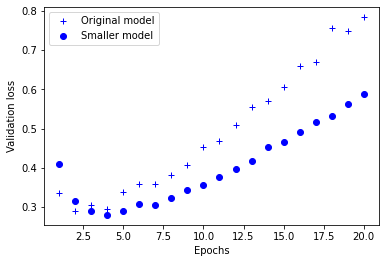

In [8]:
import matplotlib.pyplot as plt
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [9]:

bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [12]:

bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 29s 583ms/step - loss: 8.0294e-04 - acc: 1.0000 - val_loss: 0.6526 - val_acc: 0.8832
Epoch 2/20
49/49 [==============================] - 28s 579ms/step - loss: 6.7274e-05 - acc: 1.0000 - val_loss: 0.8420 - val_acc: 0.8799
Epoch 3/20
49/49 [==============================] - 28s 580ms/step - loss: 7.4986e-06 - acc: 1.0000 - val_loss: 0.9434 - val_acc: 0.8831
Epoch 4/20
49/49 [==============================] - 28s 579ms/step - loss: 7.5414e-07 - acc: 1.0000 - val_loss: 1.1089 - val_acc: 0.8836
Epoch 5/20
49/49 [==============================] - 28s 578ms/step - loss: 1.1237e-07 - acc: 1.0000 - val_loss: 1.2253 - val_acc: 0.8833
Epoch 6/20
49/49 [==============================] - 28s 579ms/step - loss: 3.0179e-08 - acc: 1.0000 - val_loss: 1.3037 - val_acc: 0.8838
Epoch 7/20
49/49 [==============================] - 28s 578ms/step - loss: 1.4703e-08 - acc: 1.0000 - val_loss: 1.3428 - val_acc: 0.8836
Epoch 8/20
49/49 [=======================

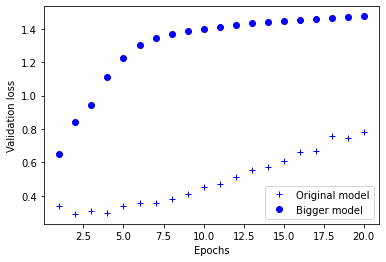

In [13]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

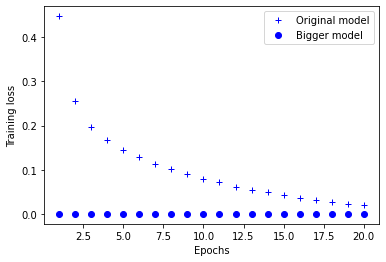

In [14]:

original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

- 용량이 큰 네트워크는 첫 번째 에포크 이후 거의 바로 과대적합이 시작되어 갈수록 더 심해짐  
- 여기서 볼 수 있듯이 용량이 큰네트워크는 훈련 손실이 매우 빠르게 0에 가까워잡나더, 
- 용량이 많은 네트워크일수록 더 빠르게 훈련데이터를 모델링을 할 수 있다.(결국 훈련 손실이 낮아짐 but 과대 적합에 민감해짐 )

#### 4.4.2 가중치 규제 추가
- 오캄의 면도날(Occam’s razor)에 따르면 더 적은 가정이 필요한 간단한 설명이 옳다. 이는 신경망으로 학습되는 모델에도 적용된다.
    - 어떤 훈련 데이터와 네트워크 구조가 주어졌을 때 데이터를 설명할 수 있는 가중치 값의 집합은 여러 개이다. 간단한 모델이 복잡한 모델보다 덜 과대적합될 가능성이 높다.
- 여기에서 간단한 모델은 파라미터 값 분포의 엔트로피가 작은 모델이다. 그러므로 과대적합을 완화하기 위한 일반적인 방법은 네트워크 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것이다.
    - 가중치 값의 분포가 더 균일하게 된다. 이를 가중치 규제(weight regularization)이라고 하며, 네트워크의 손실 함수에 큰 가중치에 연관된 비용을 추가한다. 두가지 형태의 비용이 있다.
    - L1 규제: 가중치의 절댓값에 비례하는 비용이 추가된다. (가중치의 L1 노름(norm))
    - L2 규제: 가중치의 제곱에 비례하는 비용이 추가된다. (가중치의 L2 노름). L2 규제는 신경망에서 가중치 감쇠(weight decay)라고 한다. 가중치 감쇠는 수학적으로 L2 규제와 동일하다.
- 케라스에서 가중치 규제 객체를 층의 키워드 매개변수로 전달해서 가중치 규제를 추가할 수 있다.


In [16]:

from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [17]:

l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 28ms/step - loss: 0.5145 - acc: 0.8082 - val_loss: 0.4011 - val_acc: 0.8754
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3277 - acc: 0.9054 - val_loss: 0.3408 - val_acc: 0.8877
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2769 - acc: 0.9188 - val_loss: 0.3313 - val_acc: 0.8886
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2533 - acc: 0.9280 - val_loss: 0.3341 - val_acc: 0.8862
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2375 - acc: 0.9350 - val_loss: 0.3446 - val_acc: 0.8818
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2292 - acc: 0.9379 - val_loss: 0.3492 - val_acc: 0.8803
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2223 - acc: 0.9402 - val_loss: 0.3768 - val_acc: 0.8702
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2166 - a

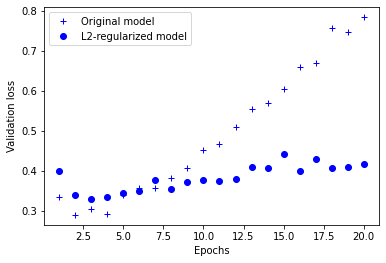

In [18]:

l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [19]:
from keras import regularizers

# L1 규제
regularizers.l1(0.001)

# L1과 L2 규제 병행
regularizers.l1_l2(l1=0.001, l2=0.001)

In [20]:

l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))


In [21]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [22]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 29ms/step - loss: 0.5806 - acc: 0.8044 - val_loss: 0.4602 - val_acc: 0.8596
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3884 - acc: 0.8897 - val_loss: 0.3964 - val_acc: 0.8732
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3438 - acc: 0.9018 - val_loss: 0.3900 - val_acc: 0.8716
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3253 - acc: 0.9078 - val_loss: 0.3599 - val_acc: 0.8874
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3167 - acc: 0.9110 - val_loss: 0.3702 - val_acc: 0.8825
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3077 - acc: 0.9154 - val_loss: 0.3674 - val_acc: 0.8834
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3053 - acc: 0.9154 - val_loss: 0.3676 - val_acc: 0.8856
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2977 - a

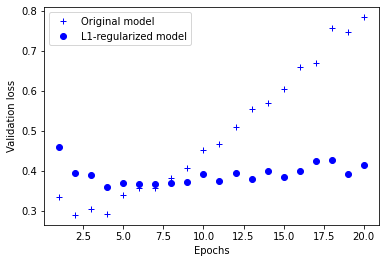

In [23]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [24]:

l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [26]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.5925 - acc: 0.8058 - val_loss: 0.4670 - val_acc: 0.8642
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4038 - acc: 0.8879 - val_loss: 0.4110 - val_acc: 0.8650
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3519 - acc: 0.8987 - val_loss: 0.3640 - val_acc: 0.8877
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3264 - acc: 0.9073 - val_loss: 0.3583 - val_acc: 0.8874
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3147 - acc: 0.9109 - val_loss: 0.3599 - val_acc: 0.8857
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3054 - acc: 0.9151 - val_loss: 0.3634 - val_acc: 0.8835
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2991 - acc: 0.9166 - val_loss: 0.3615 - val_acc: 0.8860
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2947 - a

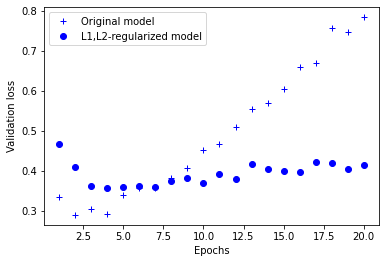

In [27]:

l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

#### 4.4.3 드롭아웃 추가
- 네트워크 층에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외시킵니다.
```python
# 훈련할 때 유닛의 출력 중 50%를 버립니다
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
```
테스트할 때는 드롭아웃 비율로 출력을 낮추어 주어야 합니다. 여기에서는 0.5배만큼 스케일을 조정했습니다(앞에서 절반의 유닛을 드롭아웃했으므로):
```python
# 테스트 단계
layer_output *= 0.5
```
훈련 단계에 이 두 연산을 포함시켜 테스트 단계에는 출력을 그대로 두도록 구현할 수 있습니다. 실제로 종종 이런 방식으로 구현합니다:

```python
# 훈련 단계
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# 여기에서 스케일을 낮추는 대신 높입니다![image.png](attachment:image.png)
layer_output /= 0.5
```
왜 드롭아웃이 과대적합을 줄이는 데 도움이 될까요? 힌튼은 은행에서 사용하는 부정 방지 메커니즘에서 착안했다고 합니다. 그의 말을 빌리면 “은행에 갔을 때 행원들이 계속 바뀌길래 왜 그런지를 물었습니다. 자신들도 이유는 모르지만 자주 업무가 바뀐다고 했습니다. 나는 은행에서 부정 행위를 하려면 직원들 사이의 유대가 필요하기 때문이라고 판단했습니다. 

**핵심 아이디어는 층의 출력 값에 노이즈를 추가하여 중요하지 않은 우연한 패턴(힌튼이 이야기한 부정한 협업)을 깨뜨리는 것입니다.**

- 신경망에서 과대적합을 방지하기 위해 가장 널리 사용하는 방법은 다음과 같습니다.

1. 훈련 데이터를 더 모읍니다.
2. 네트워크의 용량을 감소시킵니다.
3. 가중치 규제를 추가합니다.
4. 드롭아웃을 추가합니다